In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [105]:
df = pd.read_csv('/content/drive/MyDrive/3-2/MLprogramming/11week/WISDM.csv', header=None)
display(df)

,0,1,2,3,4,5,6
0,0,33,Jogging,4.910600e+13,-0.694638,12.680544,0.503953
1,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
2,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
3,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
4,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...,...
1048570,1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048571,1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048572,1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048573,1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [106]:
df.columns = ['ID','Activity_ID','Activity','Timestamp','X','Y','Z']

In [107]:
df.columns

Index(['ID', 'Activity_ID', 'Activity', 'Timestamp', 'X', 'Y', 'Z'], dtype='object')

In [108]:
df['Activity'].unique()

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [109]:
df

,ID,Activity_ID,Activity,Timestamp,X,Y,Z
0,0,33,Jogging,4.910600e+13,-0.694638,12.680544,0.503953
1,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
2,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
3,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
4,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...,...
1048570,1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048571,1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048572,1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048573,1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [110]:
# Assuming 'Jogging' column contains activity names
df = df[df['Activity'].isin(['Jogging', 'Sitting'])]
df

,ID,Activity_ID,Activity,Timestamp,X,Y,Z
0,0,33,Jogging,4.910600e+13,-0.694638,12.680544,0.503953
1,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
2,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
3,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
4,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...,...
1036605,1036606,7,Jogging,2.082540e+14,1.420000,-2.340000,1.950000
1036606,1036607,7,Jogging,2.082540e+14,-0.800000,0.230000,0.950000
1036607,1036608,7,Jogging,2.082540e+14,-0.110000,9.110000,-0.930000
1036608,1036609,7,Jogging,2.082540e+14,-2.560000,20.040000,0.080000


In [135]:
df['Activity'].unique()

array([0, 1])

In [112]:
df.shape

(380851, 7)

In [113]:
df.isnull().values.any()

np.False_

In [114]:
LABELS = ["Normal", "Fraud"]

/tmp/ipython-input-216853043.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Activity'], sort = True)


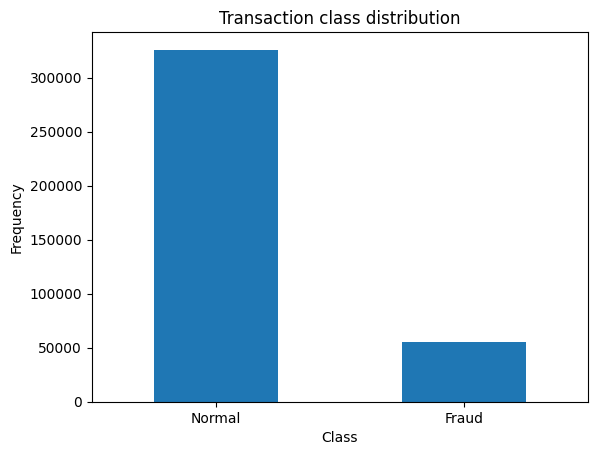

In [115]:
count_classes = pd.value_counts(df['Activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [116]:
df['Amount'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)

/tmp/ipython-input-3819553471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)


In [117]:
df['Activity'] = df['Activity'].map({'Jogging': 0, 'Sitting': 1})
display(df.head())

/tmp/ipython-input-634241541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activity'] = df['Activity'].map({'Jogging': 0, 'Sitting': 1})


,ID,Activity_ID,Activity,Timestamp,X,Y,Z,Amount
0,0,33,0,4.910600e+13,-0.694638,12.680544,0.503953,12.709551
1,1,33,0,4.910610e+13,5.012288,11.264028,0.953424,12.365693
2,2,33,0,4.910610e+13,4.903325,10.882658,-0.081722,11.936562
3,3,33,0,4.910620e+13,-0.612916,18.496431,3.023717,18.751973
4,4,33,0,4.910630e+13,-1.184970,12.108489,7.205164,14.139804


In [118]:
frauds = df[df.Activity == 1]
normal = df[df.Activity == 0]
frauds.shape

(54876, 8)

In [119]:
normal.shape

(325975, 8)

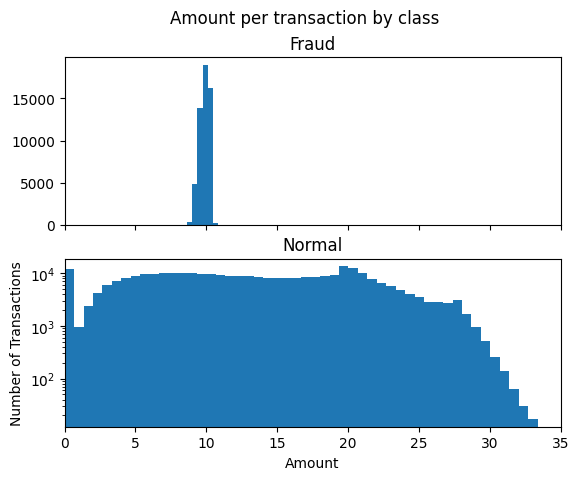

In [120]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 35))
plt.yscale('log')
plt.show();

In [121]:
# f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# f.suptitle('Time of transaction vs Amount by class')

# ax1.scatter(frauds.Time, frauds.Amount)
# ax1.set_title('Fraud')

# ax2.scatter(normal.Time, normal.Amount)
# ax2.set_title('Normal')

# plt.xlabel('Time (in Seconds)')
# plt.ylabel('Amount')
# plt.show()

In [122]:
df.columns

Index(['ID', 'Activity_ID', 'Activity', 'Timestamp', 'X', 'Y', 'Z', 'Amount'], dtype='object')

In [123]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['ID','Activity_ID','Timestamp',], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [124]:
data

,Activity,X,Y,Z,Amount
0,0,-0.694638,12.680544,0.503953,-0.028122
1,0,5.012288,11.264028,0.953424,-0.078677
2,0,4.903325,10.882658,-0.081722,-0.141768
3,0,-0.612916,18.496431,3.023717,0.860243
4,0,-1.184970,12.108489,7.205164,0.182155
...,...,...,...,...,...
1036605,0,1.420000,-2.340000,1.950000,-1.402600
1036606,0,-0.800000,0.230000,0.950000,-1.710997
1036607,0,-0.110000,9.110000,-0.930000,-0.550275
1036608,0,-2.560000,20.040000,0.080000,1.073577


In [125]:
RANDOM_SEED = 42

In [126]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Activity == 0]
X_train = X_train.drop(['Activity'], axis=1)

y_test = X_test['Activity']
X_test = X_test.drop(['Activity'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(260847, 4)

In [127]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [128]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 54.0945 - val_loss: 52.1605
Epoch 2/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52.1486 - val_loss: 52.1103
Epoch 3/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 52.1467 - val_loss: 52.1005
Epoch 4/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52.0663 - val_loss: 52.0966
Epoch 5/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52.1766 - val_loss: 52.0946
Epoch 6/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52.2869 - val_loss: 52.0931
Epoch 7/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52.3446 - val_loss: 52.0917
Epoch 8/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 52.2283 - val_loss: 52.0898
Epoch 9/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 52.1417 - val_loss: 52.0794
Epoch 10/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52.2585 - val_loss: 52.0713
Epoch 11/50
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 52.3010 - val_loss: 52.0702
Epoch 12/50
918/918 ━━━━━━━━━━

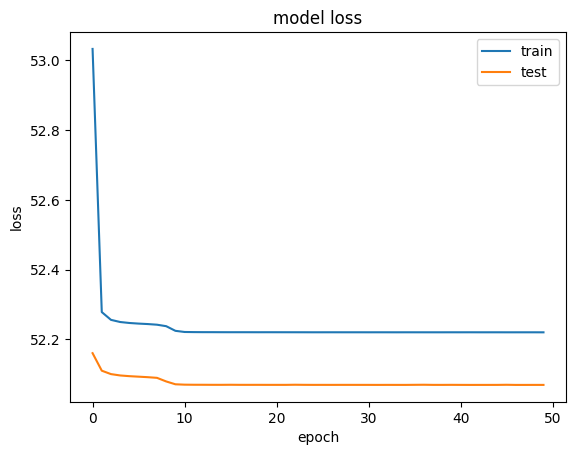

In [129]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [130]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2381/2381 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


,reconstruction_error,true_class
count,76171.000000,76171.000000
mean,47.245163,0.144976
std,45.384640,0.352079
min,0.673721,0.000000
25%,14.519131,0.000000
50%,26.486758,0.000000
75%,77.794157,0.000000
max,269.389236,1.000000


In [131]:
error_df.head()

,reconstruction_error,true_class
106873,133.321321,0
125283,16.980384,0
634103,97.131009,0
198929,17.920969,0
422861,17.461056,0


In [132]:
threshold = 15

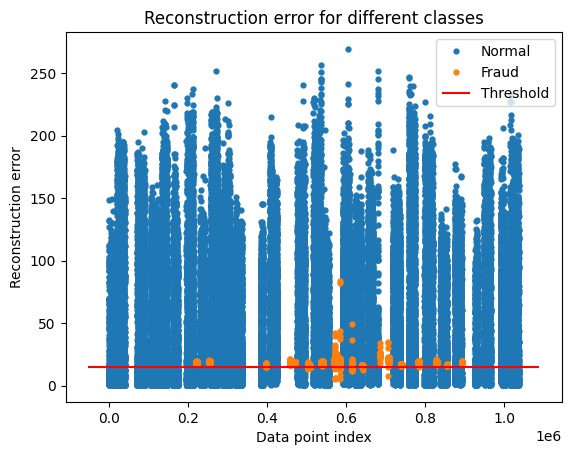

In [133]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


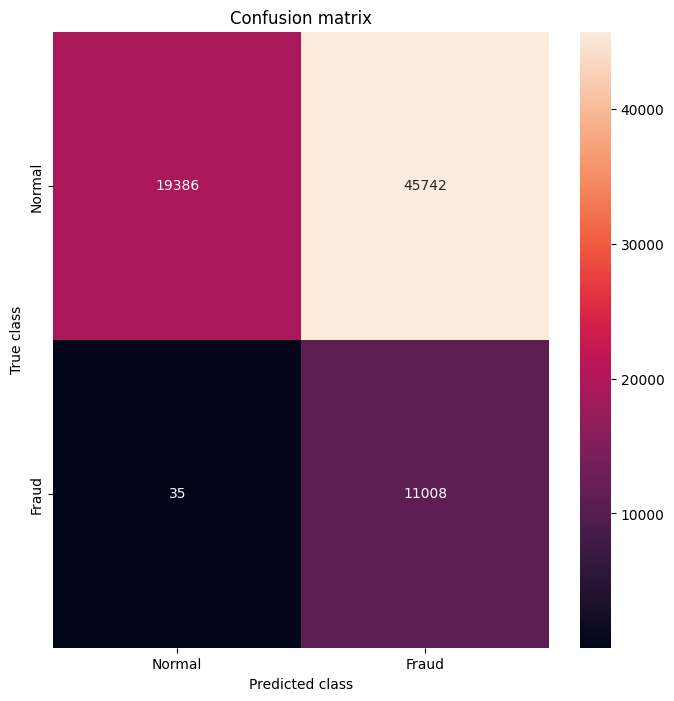

              precision    recall  f1-score   support

           0       1.00      0.30      0.46     65128
           1       0.19      1.00      0.32     11043

    accuracy                           0.40     76171
   macro avg       0.60      0.65      0.39     76171
weighted avg       0.88      0.40      0.44     76171



In [134]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))